**Zad. 1**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

**Zad.1 pkt. 1.1**

In [ ]:
image_path = 'palm_tree.jpg'
image = Image.open(image_path)
image_data = np.array(image)
print("Kody RGB dla każdego piksela: \n", image_data)

Kody RGB dla każdego piksela: 
 [[[ 28  35  63]
  [ 35  50  83]
  [ 98 118 153]
  ...
  [  3   3   3]
  [  3   3   3]
  [  3   3   3]]

 [[ 25  29  56]
  [ 36  47  79]
  [ 98 117 150]
  ...
  [  3   3   3]
  [  3   3   3]
  [  4   4   4]]

 [[ 25  23  47]
  [ 36  43  72]
  [ 98 113 146]
  ...
  [  3   3   3]
  [  4   4   4]
  [  4   4   4]]

 ...

 [[ 46  32  31]
  [ 44  30  29]
  [ 49  34  31]
  ...
  [ 35  25  23]
  [ 36  26  24]
  [ 36  26  24]]

 [[ 36  20  20]
  [ 47  31  31]
  [ 59  41  39]
  ...
  [ 42  32  30]
  [ 39  29  27]
  [ 37  27  25]]

 [[ 41  27  26]
  [ 49  33  33]
  [ 58  40  38]
  ...
  [ 59  43  43]
  [ 51  37  36]
  [ 46  32  31]]]


**Zad.1 pkt. 1.2**

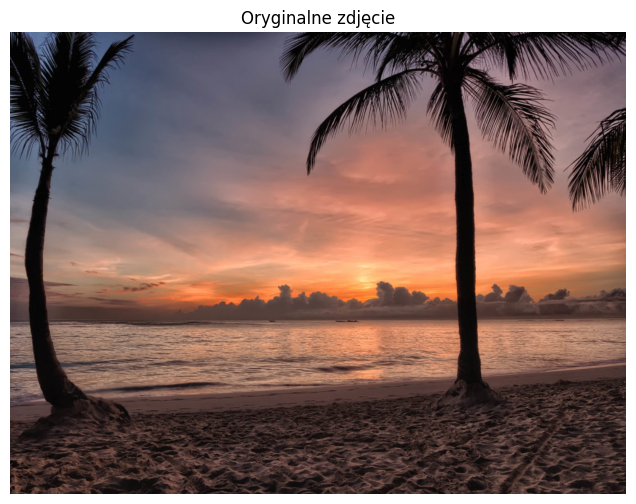

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.title("Oryginalne zdjęcie")
plt.axis('off')
plt.show()

**Zad.1 pkt. 1.3-5**

In [ ]:
pixels = image_data.reshape(-1, 3)
kmeans = KMeans()
kmeans.fit(pixels)

print("Rozmiary zdjęcia (wysokość, szerokość, kanały RGB):", image_data.shape)

print("Przekształcone dane (2D):", pixels.shape)

Rozmiary zdjęcia (wysokość, szerokość, kanały RGB): (825, 1100, 3)
Przekształcone dane (2D): (907500, 3)


**Zad.1 pkt. 1.6**

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(pixels)

KMeans(n_clusters=6, random_state=0)

**Zad.1 pkt. 1.7**

In [ ]:
labels = kmeans.labels_
print("Etykiety klastrów dla każdego piksela: \n", labels)

Etykiety klastrów dla każdego piksela: 
 [3 3 5 ... 3 3 3]


**Zad.1 pkt. 1.8**

In [ ]:
centroids = kmeans.cluster_centers_
print("Współrzędne centroidów: \n", centroids)

Współrzędne centroidów: 
 [[225.3442035  149.80133774 113.13886839]
 [ 90.73888512  66.89564784  64.21946204]
 [ 17.05307179  11.68495306  11.53865426]
 [ 55.6501672   39.30592305  38.17739171]
 [166.5614699  124.16975639 111.78680013]
 [107.21909895 101.38317482 114.483146  ]]


**Zad.1 pkt. 1.9**

In [ ]:
centroids_rounded = np.round(centroids, 0).astype(int)
print("Zaokrąglone współrzędne centroidów: \n", centroids_rounded)

Zaokrąglone współrzędne centroidów: 
 [[225 150 113]
 [ 91  67  64]
 [ 17  12  12]
 [ 56  39  38]
 [167 124 112]
 [107 101 114]]


**Zad.1 pkt. 1.10**

In [ ]:
quantized_image = centroids_rounded[labels].reshape(image_data.shape)

**Zad.1 pkt. 1.11**

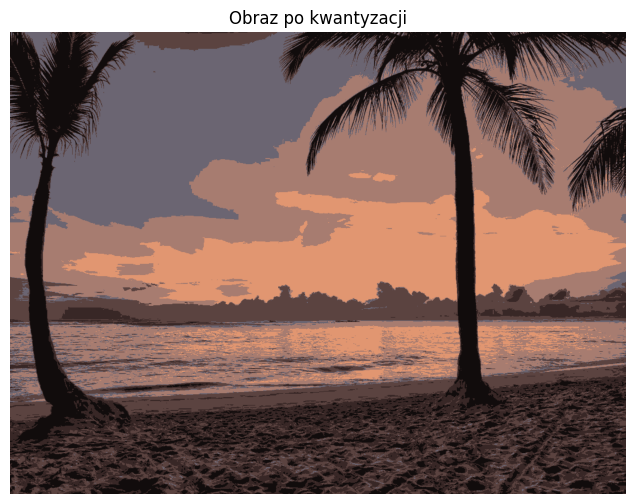

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(quantized_image)
plt.title("Obraz po kwantyzacji")
plt.axis('off')
plt.show()

**Zad.2**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

**Zad.2.1**

In [ ]:
iris_data = pd.read_csv('iris.csv')

**Zad.2.2**

In [ ]:
print(iris_data.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


**Zad.2.3**

In [ ]:
print(iris_data.describe())
print(iris_data.info())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Non

**Zad.2.4**

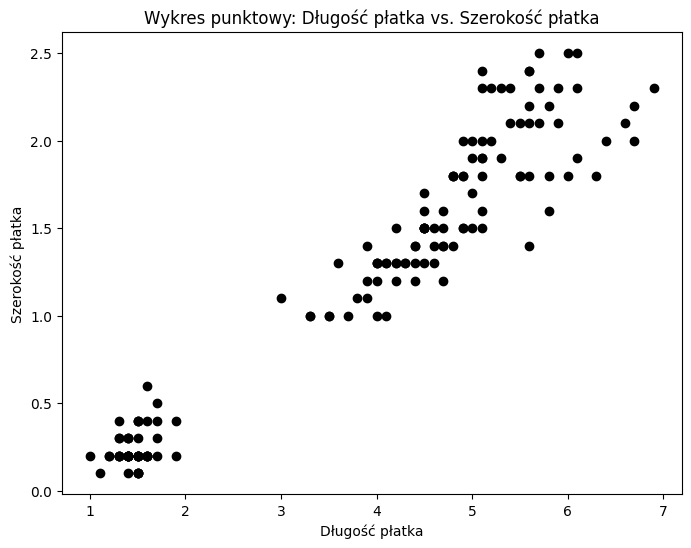


Na podstawie wykresu można zasugerować, że zbiór danych można podzielić na 3 skupienia.


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(iris_data['petal_length'], iris_data['petal_width'], c='black')
plt.xlabel('Długość płatka')
plt.ylabel('Szerokość płatka')
plt.title('Wykres punktowy: Długość płatka vs. Szerokość płatka')
plt.show()
print("\nNa podstawie wykresu można zasugerować, że zbiór danych można podzielić na 3 skupienia.")


**Zad.2.5**

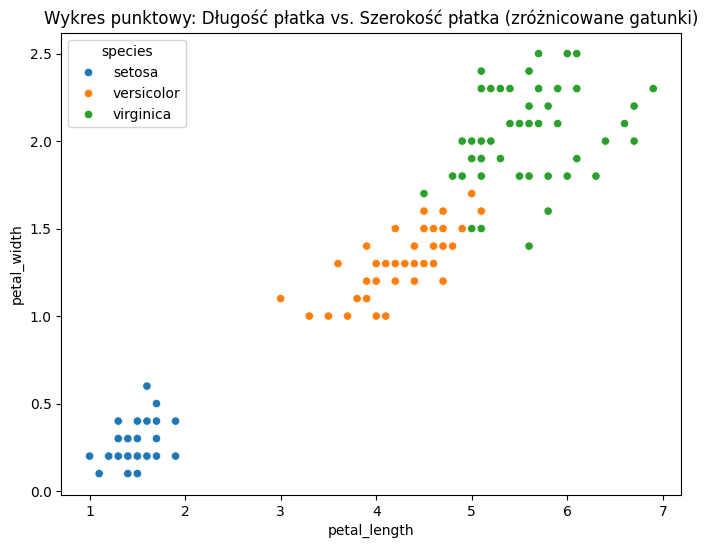

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_data)
plt.title('Wykres punktowy: Długość płatka vs. Szerokość płatka (zróżnicowane gatunki)')
plt.show()

**Zad.2.6**

In [ ]:
df_iris = iris_data.drop(columns=['species'])

**Zad.2.7**

In [ ]:
scaler = StandardScaler()
df_iris_std = pd.DataFrame(scaler.fit_transform(df_iris), columns=df_iris.columns)


**Zad.2.8**

In [ ]:
normalizer = MinMaxScaler()
df_iris_norm = pd.DataFrame(normalizer.fit_transform(df_iris), columns=df_iris.columns)

**Zad.2.9**

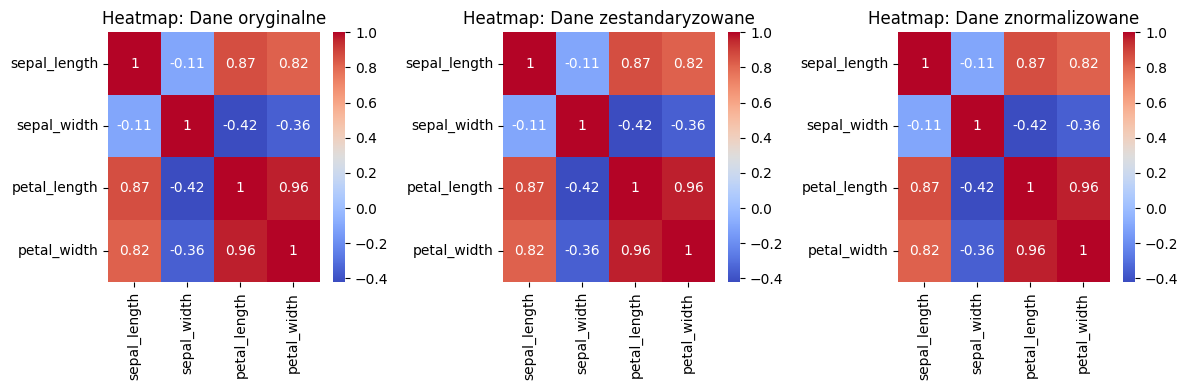

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.heatmap(df_iris.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap: Dane oryginalne")

plt.subplot(1, 3, 2)
sns.heatmap(df_iris_std.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap: Dane zestandaryzowane")

plt.subplot(1, 3, 3)
sns.heatmap(df_iris_norm.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap: Dane znormalizowane")

plt.tight_layout()
plt.show()

**Zad.2.10**

In [ ]:
linkage_methods = ['ward', 'single', 'complete']
for method in linkage_methods:
    model = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = model.fit_predict(df_iris)
    print(f"\nEtykiety klastrów dla metody {method}: {labels}")


Etykiety klastrów dla metody ward: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

Etykiety klastrów dla metody single: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]

Etykiety klastrów dla metody complete: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(df_iris)
print("\nEtykiety klastrów dla algorytmu k-średnich:", kmeans_labels)


Etykiety klastrów dla algorytmu k-średnich: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


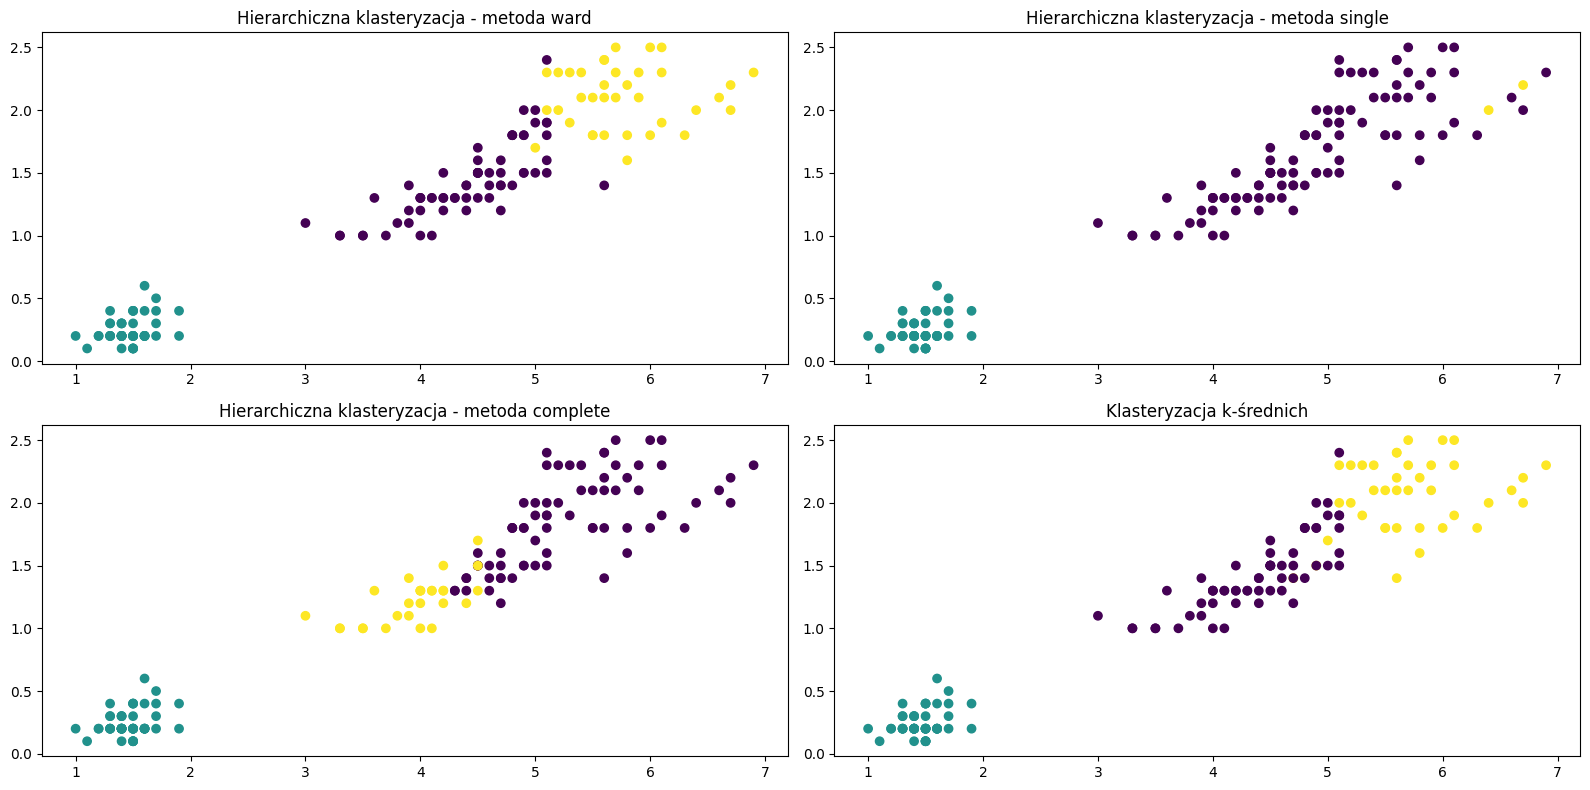

In [ ]:
iris_labeled = df_iris.copy()

plt.figure(figsize=(16, 8))
for idx, method in enumerate(linkage_methods):
    model = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = model.fit_predict(df_iris)
    iris_labeled['agglom_labels_' + method] = labels
    plt.subplot(2, 2, idx + 1)
    plt.scatter(df_iris['petal_length'], df_iris['petal_width'], c=labels)
    plt.title(f"Hierarchiczna klasteryzacja - metoda {method}")

plt.subplot(2, 2, 4)
plt.scatter(df_iris['petal_length'], df_iris['petal_width'], c=kmeans_labels)
plt.title("Klasteryzacja k-średnich")
plt.tight_layout()
plt.show()

**Zad. 2.11**

In [ ]:
for method in linkage_methods:
    model_std = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels_std = model_std.fit_predict(df_iris_std)
    print(f"\nEtykiety klastrów (zestandaryzowane) dla metody {method}: {labels_std}")

kmeans_std = KMeans(n_clusters=3, random_state=0)
kmeans_labels_std = kmeans_std.fit_predict(df_iris_std)
print("\nEtykiety klastrów (zestandaryzowane) dla algorytmu k-średnich:", kmeans_labels_std)


Etykiety klastrów (zestandaryzowane) dla metody ward: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 0 2 0 2 0 2 2 2 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]

Etykiety klastrów (zestandaryzowane) dla metody single: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]

Etykiety klastrów (zestandaryzowane) dla metody complete: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 0 2 0 0 0 0 2 2 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 0 0 0 2 0 2 2 0 2 2 2 0 0 0 2 2 0 0 0 0 0 0 2 

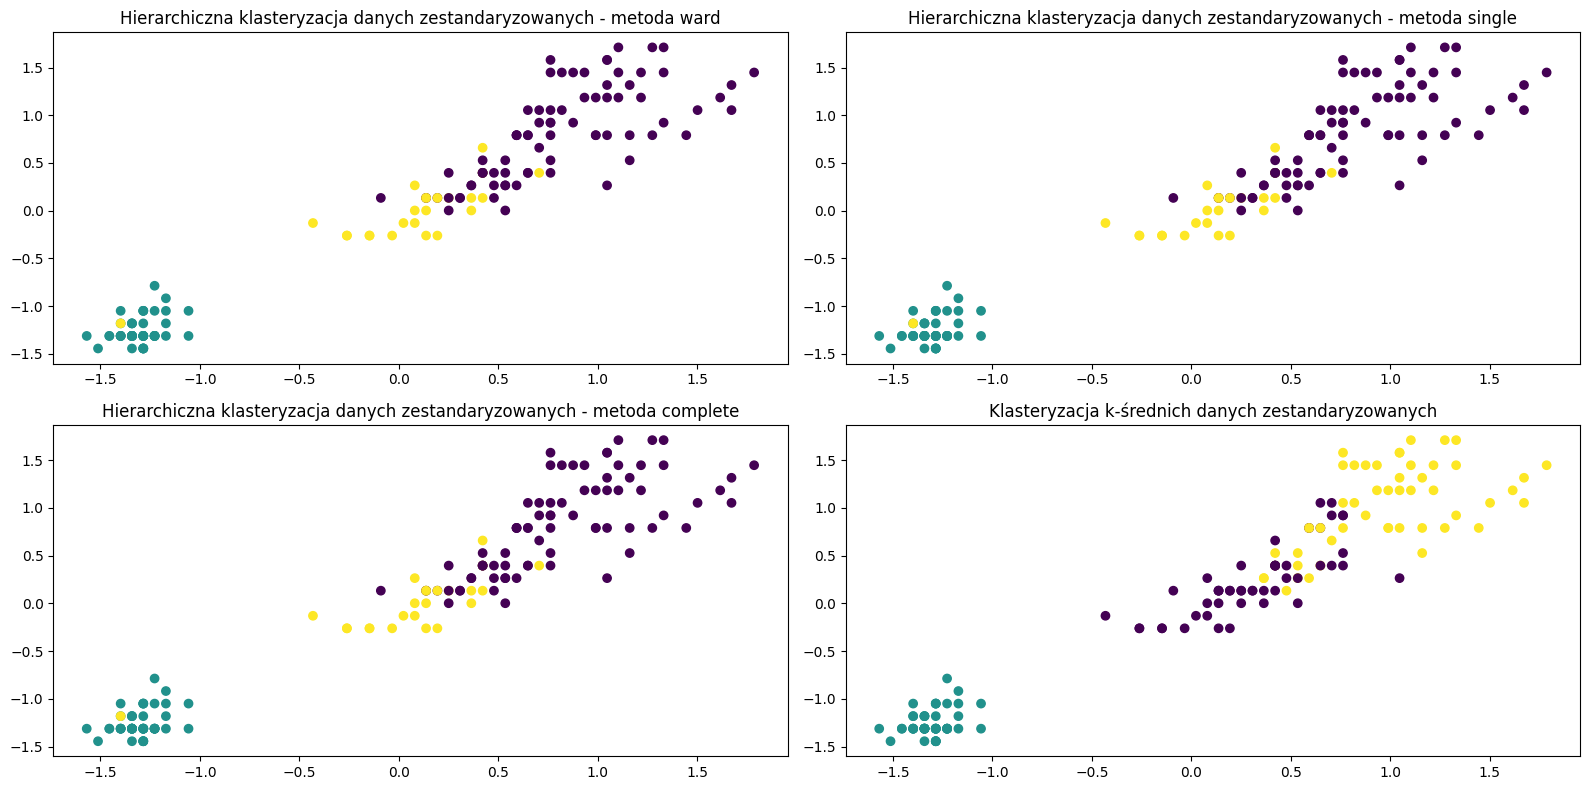

In [ ]:
iris_labeled_std = df_iris.copy()

plt.figure(figsize=(16, 8))
for idx, method in enumerate(linkage_methods):
    model_std = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels_std = model.fit_predict(df_iris_std)
    iris_labeled_std['agglom_labels_' + method] = labels_std
    plt.subplot(2, 2, idx + 1)
    plt.scatter(df_iris_std['petal_length'], df_iris_std['petal_width'], c=labels_std)
    plt.title(f"Hierarchiczna klasteryzacja danych zestandaryzowanych - metoda {method}")

iris_labeled_std['kmeans_labels'] = kmeans_labels_std
plt.subplot(2, 2, 4)
plt.scatter(df_iris_std['petal_length'], df_iris_std['petal_width'], c=kmeans_labels_std)
plt.title("Klasteryzacja k-średnich danych zestandaryzowanych")
plt.tight_layout()
plt.show()

**Zad. 2.12**

In [ ]:
for method in linkage_methods:
    model_norm = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels_norm = model_norm.fit_predict(df_iris_norm)
    print(f"\nEtykiety klastrów (znormalizowane) dla metody {method}: {labels_norm}")

kmeans_norm = KMeans(n_clusters=3, random_state=0)
kmeans_labels_norm = kmeans_norm.fit_predict(df_iris_norm)
print("\nEtykiety klastrów (znormalizowane) dla algorytmu k-średnich:", kmeans_labels_norm)


Etykiety klastrów (znormalizowane) dla metody ward: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

Etykiety klastrów (znormalizowane) dla metody single: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]

Etykiety klastrów (znormalizowane) dla metody complete: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 2 1 

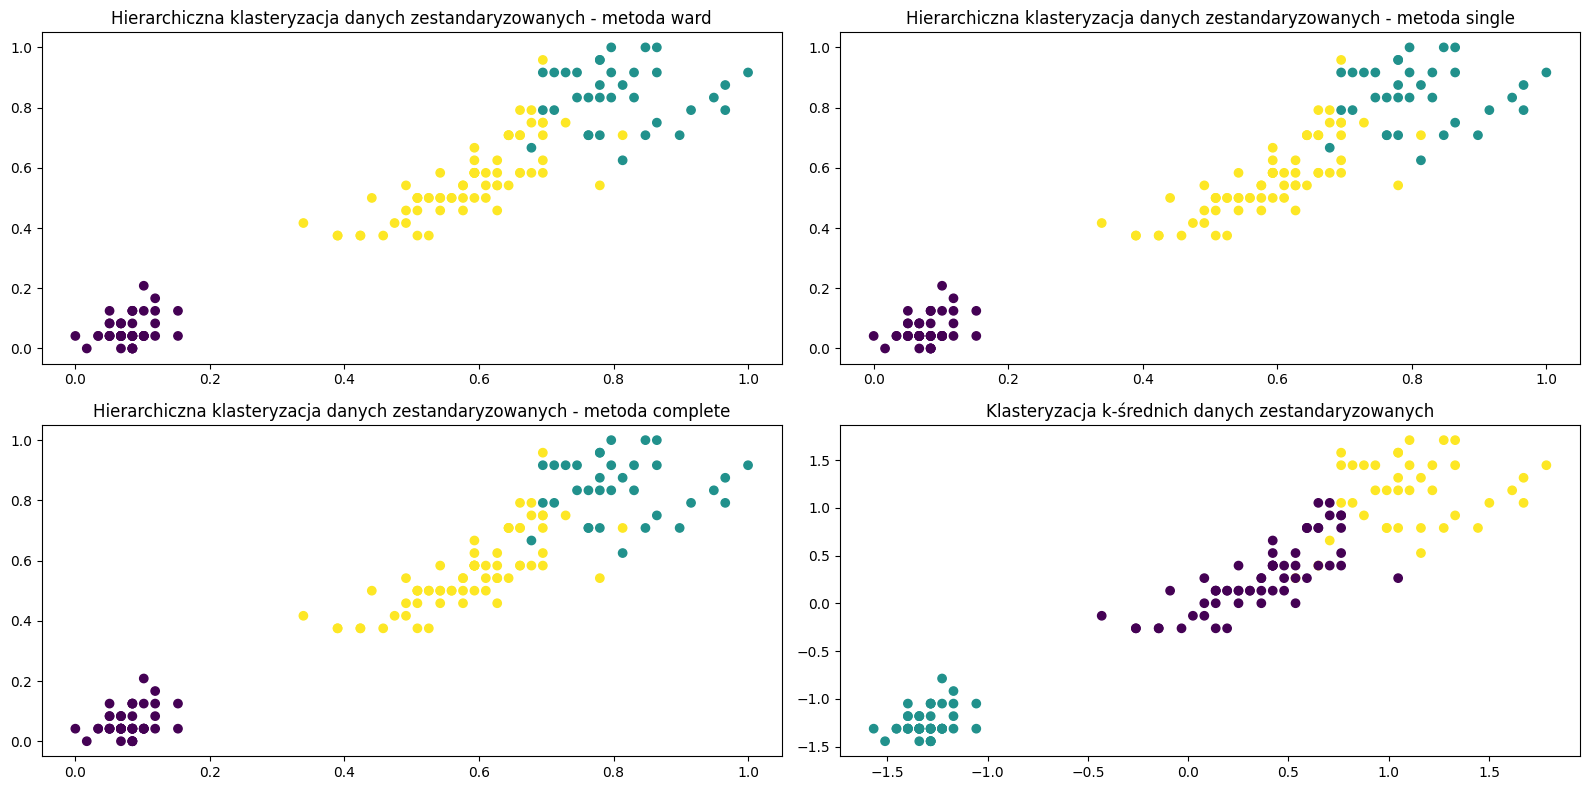

In [ ]:
iris_labeled_norm = df_iris.copy()

plt.figure(figsize=(16, 8))
for idx, method in enumerate(linkage_methods):
    model_norm = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels_norm = model.fit_predict(df_iris_norm)
    iris_labeled_norm['agglom_labels_' + method] = labels_norm
    plt.subplot(2, 2, idx + 1)
    plt.scatter(df_iris_norm['petal_length'], df_iris_norm['petal_width'], c=labels_norm)
    plt.title(f"Hierarchiczna klasteryzacja danych zestandaryzowanych - metoda {method}")

iris_labeled_norm['kmeans_labels'] = kmeans_labels_norm
plt.subplot(2, 2, 4)
plt.scatter(df_iris_std['petal_length'], df_iris_std['petal_width'], c=kmeans_labels_norm)
plt.title("Klasteryzacja k-średnich danych zestandaryzowanych")
plt.tight_layout()
plt.show()

In [ ]:
iris_labeled['kmeans_labels'] = kmeans_labels

In [ ]:

iris_labeled.groupby('kmeans_labels').mean()

,sepal_length,sepal_width,petal_length,petal_width,agglom_labels_ward,agglom_labels_single,agglom_labels_complete
kmeans_labels,,,,,,,
0,5.883607,2.740984,4.388525,1.434426,0.000000,0.000000,0.918033
1,5.006000,3.418000,1.464000,0.244000,1.000000,1.000000,1.000000
2,6.853846,3.076923,5.715385,2.053846,1.846154,0.102564,0.000000


In [ ]:
iris_labeled.groupby('agglom_labels_ward').mean()

,sepal_length,sepal_width,petal_length,petal_width,agglom_labels_single,agglom_labels_complete,kmeans_labels
agglom_labels_ward,,,,,,,
0,5.920312,2.751562,4.420312,1.434375,0.000000,0.875,0.09375
1,5.006000,3.418000,1.464000,0.244000,1.000000,1.000,1.00000
2,6.869444,3.086111,5.769444,2.105556,0.111111,0.000,2.00000


In [ ]:
iris_labeled.groupby('agglom_labels_single').mean()

,sepal_length,sepal_width,petal_length,petal_width,agglom_labels_ward,agglom_labels_complete,kmeans_labels
agglom_labels_single,,,,,,,
0,6.230612,2.853061,4.872449,1.667347,0.693878,0.571429,0.755102
1,5.006000,3.418000,1.464000,0.244000,1.000000,1.000000,1.000000
2,7.800000,3.800000,6.550000,2.100000,2.000000,0.000000,2.000000


In [ ]:
iris_labeled.groupby('agglom_labels_complete').mean()

,sepal_length,sepal_width,petal_length,petal_width,agglom_labels_ward,agglom_labels_single,kmeans_labels
agglom_labels_complete,,,,,,,
0,6.545833,2.963889,5.273611,1.850000,1.0,0.055556,1.083333
1,5.006000,3.418000,1.464000,0.244000,1.0,1.000000,1.000000
2,5.532143,2.635714,3.960714,1.228571,0.0,0.000000,0.000000


In [ ]:
iris_labeled['species'] = iris_data['species']
pd.crosstab(iris_labeled['species'], iris_labeled['kmeans_labels'], normalize='index') * 100

kmeans_labels,0,1,2
species,,,
setosa,0.0,100.0,0.0
versicolor,94.0,0.0,6.0
virginica,28.0,0.0,72.0


In [ ]:
pd.crosstab(iris_labeled['species'], iris_labeled['agglom_labels_ward'], normalize='index') * 100

agglom_labels_ward,0,1,2
species,,,
setosa,0.0,100.0,0.0
versicolor,98.0,0.0,2.0
virginica,30.0,0.0,70.0


In [ ]:
pd.crosstab(iris_labeled['species'], iris_labeled['agglom_labels_single'], normalize='index') * 100

agglom_labels_single,0,1,2
species,,,
setosa,0.0,100.0,0.0
versicolor,100.0,0.0,0.0
virginica,96.0,0.0,4.0


In [ ]:
pd.crosstab(iris_labeled['species'], iris_labeled['agglom_labels_complete'], normalize='index') * 100

agglom_labels_complete,0,1,2
species,,,
setosa,0.0,100.0,0.0
versicolor,46.0,0.0,54.0
virginica,98.0,0.0,2.0


In [ ]:
####################### STD

In [ ]:

iris_labeled_std.groupby('kmeans_labels').mean()

,sepal_length,sepal_width,petal_length,petal_width,agglom_labels_ward,agglom_labels_single,agglom_labels_complete
kmeans_labels,,,,,,,
0,5.779592,2.653061,4.326531,1.379592,0.938776,0.938776,0.938776
1,5.006000,3.418000,1.464000,0.244000,1.020000,1.020000,1.020000
2,6.725490,3.082353,5.462745,1.960784,0.000000,0.000000,0.000000


In [ ]:
iris_labeled_std.groupby('agglom_labels_ward').mean()

,sepal_length,sepal_width,petal_length,petal_width,agglom_labels_single,agglom_labels_complete,kmeans_labels
agglom_labels_ward,,,,,,,
0,6.472727,2.990909,5.183117,1.815584,0.0,0.0,1.324675
1,5.016327,3.440816,1.467347,0.242857,1.0,1.0,1.000000
2,5.512500,2.466667,3.866667,1.170833,2.0,2.0,0.041667


In [ ]:
iris_labeled_std.groupby('agglom_labels_single').mean()

,sepal_length,sepal_width,petal_length,petal_width,agglom_labels_ward,agglom_labels_complete,kmeans_labels
agglom_labels_single,,,,,,,
0,6.472727,2.990909,5.183117,1.815584,0.0,0.0,1.324675
1,5.016327,3.440816,1.467347,0.242857,1.0,1.0,1.000000
2,5.512500,2.466667,3.866667,1.170833,2.0,2.0,0.041667


In [ ]:
iris_labeled_std.groupby('agglom_labels_complete').mean()

,sepal_length,sepal_width,petal_length,petal_width,agglom_labels_ward,agglom_labels_single,kmeans_labels
agglom_labels_complete,,,,,,,
0,6.472727,2.990909,5.183117,1.815584,0.0,0.0,1.324675
1,5.016327,3.440816,1.467347,0.242857,1.0,1.0,1.000000
2,5.512500,2.466667,3.866667,1.170833,2.0,2.0,0.041667


In [ ]:
iris_labeled_std['species'] = iris_data['species']
pd.crosstab(iris_labeled_std['species'], iris_labeled_std['kmeans_labels'], normalize='index') * 100

kmeans_labels,0,1,2
species,,,
setosa,0.0,100.0,0.0
versicolor,76.0,0.0,24.0
virginica,22.0,0.0,78.0


In [ ]:
pd.crosstab(iris_labeled_std['species'], iris_labeled_std['agglom_labels_ward'], normalize='index') * 100

agglom_labels_ward,0,1,2
species,,,
setosa,0.0,98.0,2.0
versicolor,58.0,0.0,42.0
virginica,96.0,0.0,4.0


In [ ]:
pd.crosstab(iris_labeled_std['species'], iris_labeled_std['agglom_labels_single'], normalize='index') * 100

agglom_labels_single,0,1,2
species,,,
setosa,0.0,98.0,2.0
versicolor,58.0,0.0,42.0
virginica,96.0,0.0,4.0


In [ ]:
pd.crosstab(iris_labeled_std['species'], iris_labeled_std['agglom_labels_complete'], normalize='index') * 100

agglom_labels_complete,0,1,2
species,,,
setosa,0.0,98.0,2.0
versicolor,58.0,0.0,42.0
virginica,96.0,0.0,4.0


In [ ]:
############ NORM

In [ ]:
iris_labeled_norm['species'] = iris_data['species']
pd.crosstab(iris_labeled_norm['species'], iris_labeled_norm['kmeans_labels'], normalize='index') * 100

kmeans_labels,0,1,2
species,,,
setosa,0.0,100.0,0.0
versicolor,94.0,0.0,6.0
virginica,28.0,0.0,72.0


In [ ]:
pd.crosstab(iris_labeled_norm['species'], iris_labeled_norm['agglom_labels_ward'], normalize='index') * 100

agglom_labels_ward,0,1,2
species,,,
setosa,100.0,0.0,0.0
versicolor,0.0,2.0,98.0
virginica,0.0,66.0,34.0


In [ ]:
pd.crosstab(iris_labeled_norm['species'], iris_labeled_norm['agglom_labels_single'], normalize='index') * 100

agglom_labels_single,0,1,2
species,,,
setosa,100.0,0.0,0.0
versicolor,0.0,2.0,98.0
virginica,0.0,66.0,34.0


In [ ]:
pd.crosstab(iris_labeled_norm['species'], iris_labeled_norm['agglom_labels_complete'], normalize='index') * 100

agglom_labels_complete,0,1,2
species,,,
setosa,100.0,0.0,0.0
versicolor,0.0,2.0,98.0
virginica,0.0,66.0,34.0


In [ ]:
species_counts = iris_data['species'].value_counts()

def calculate_cluster_percentages(labels, iris_data, label_column_name):
    # Tworzymy kopię oryginalnych danych i dodajemy kolumnę z etykietami
    labeled_iris = iris_data.copy()
    labeled_iris[label_column_name] = labels
    percentages = {}

    # Dla każdego gatunku liczymy procent kwiatów przypisanych do każdego klastra
    for species in species_counts.index:
        species_data = labeled_iris[labeled_iris['species'] == species]
        cluster_counts = species_data[label_column_name].value_counts(normalize=True) * 100
        percentages[species] = cluster_counts
    return pd.DataFrame(percentages).fillna(0).T

# Etykiety klastrów dla danych oryginalnych
print("Procentowy podział klastrów dla danych oryginalnych:")
for method in linkage_methods:
    labels = AgglomerativeClustering(n_clusters=3, linkage=method).fit_predict(df_iris)
    cluster_percentages = calculate_cluster_percentages(labels, iris_data, f'agglom_{method}')
    print(f"\nMetoda {method}:\n", cluster_percentages)

# k-średnich dla danych oryginalnych
kmeans_labels = KMeans(n_clusters=3, random_state=0).fit_predict(df_iris)
kmeans_percentages = calculate_cluster_percentages(kmeans_labels, iris_data, 'kmeans')
print("\nAlgorytm k-średnich dla danych oryginalnych:\n", kmeans_percentages)

Procentowy podział klastrów dla danych oryginalnych:

Metoda ward:
 agglom_ward     0      1     2
setosa        0.0  100.0   0.0
versicolor   98.0    0.0   2.0
virginica    30.0    0.0  70.0

Metoda single:
 agglom_single      0      1    2
setosa           0.0  100.0  0.0
versicolor     100.0    0.0  0.0
virginica       96.0    0.0  4.0

Metoda complete:
 agglom_complete     0      1     2
setosa            0.0  100.0   0.0
versicolor       46.0    0.0  54.0
virginica        98.0    0.0   2.0

Algorytm k-średnich dla danych oryginalnych:
 kmeans         0      1     2
setosa       0.0  100.0   0.0
versicolor  94.0    0.0   6.0
virginica   28.0    0.0  72.0


In [ ]:
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment
from sklearn.preprocessing import LabelEncoder

# Funkcja do obliczenia trafności dla klasteryzacji
def calculate_cluster_accuracy(labels, true_labels):
    # Konwersja etykiet na numeryczne, aby porównać etykiety klastrów z etykietami gatunków
    le = LabelEncoder()
    true_labels_num = le.fit_transform(true_labels)

    # Tworzymy macierz kosztów dla przypisań
    contingency_matrix = pd.crosstab(true_labels_num, labels)

    # Szukamy najlepszego przypisania etykiet klastrów do etykiet gatunków
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix.values)

    # Obliczamy trafność na podstawie najlepszego przypisania
    best_labels = [col_ind[label] for label in labels]
    accuracy = accuracy_score(true_labels_num, best_labels)

    return accuracy * 100

# Sprawdzamy trafność dla danych oryginalnych
print("Trafność klasteryzacji dla danych oryginalnych:")
for method in linkage_methods:
    labels = AgglomerativeClustering(n_clusters=3, linkage=method).fit_predict(df_iris)
    accuracy = calculate_cluster_accuracy(labels, iris_data['species'])
    print(f"Metoda {method}: {accuracy:.2f}%")

kmeans_labels = KMeans(n_clusters=3, random_state=0).fit_predict(df_iris)
kmeans_accuracy = calculate_cluster_accuracy(kmeans_labels, iris_data['species'])
print(f"Algorytm k-średnich: {kmeans_accuracy:.2f}%")

Trafność klasteryzacji dla danych oryginalnych:
Metoda ward: 89.33%
Metoda single: 68.00%
Metoda complete: 15.33%
Algorytm k-średnich: 88.67%
